## Imports 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [37]:
df = pd.read_csv('../data/loan.csv')

In [38]:
df = df[['loan_amnt', 'funded_amnt','term','int_rate','grade',
        'annual_inc','issue_d','revol_bal','total_pymnt','loan_status']]

Removing all the trailing whitespaces

In [9]:
#df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [10]:
pandas_profiling.ProfileReport(df)

Number of variables,10
Number of observations,887379
Total Missing (%),0.0%
Total size in memory,67.7 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## Data cleaning

In [39]:
df['term'] = df['term'].str.strip()

In [46]:
# Creating year and month columns for dates to analyze distribution over years
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str
df['issue_d'] = df['issue_d'].astype('datetime64[ns]')

There are 887k loans

In [13]:
df.shape

(887379, 12)

We're filling in missing values for annual income - only variable with misssing value. Since the annual income is highly correlated with funded amount, interpoloation was used as a method to fill in NAs.

In [14]:
df.annual_inc = df[['annual_inc', 'funded_amnt']].interpolate(method='values')[['annual_inc']]

## Explore the loan status distribution

In [15]:
df.loc[df.loan_status == \
            'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
df.loc[df.loan_status == \
            'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'


Current               601779
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
NMCP Fully Paid         1988
Default                 1219
NMCP Charged Off         761
Name: loan_status, dtype: int64


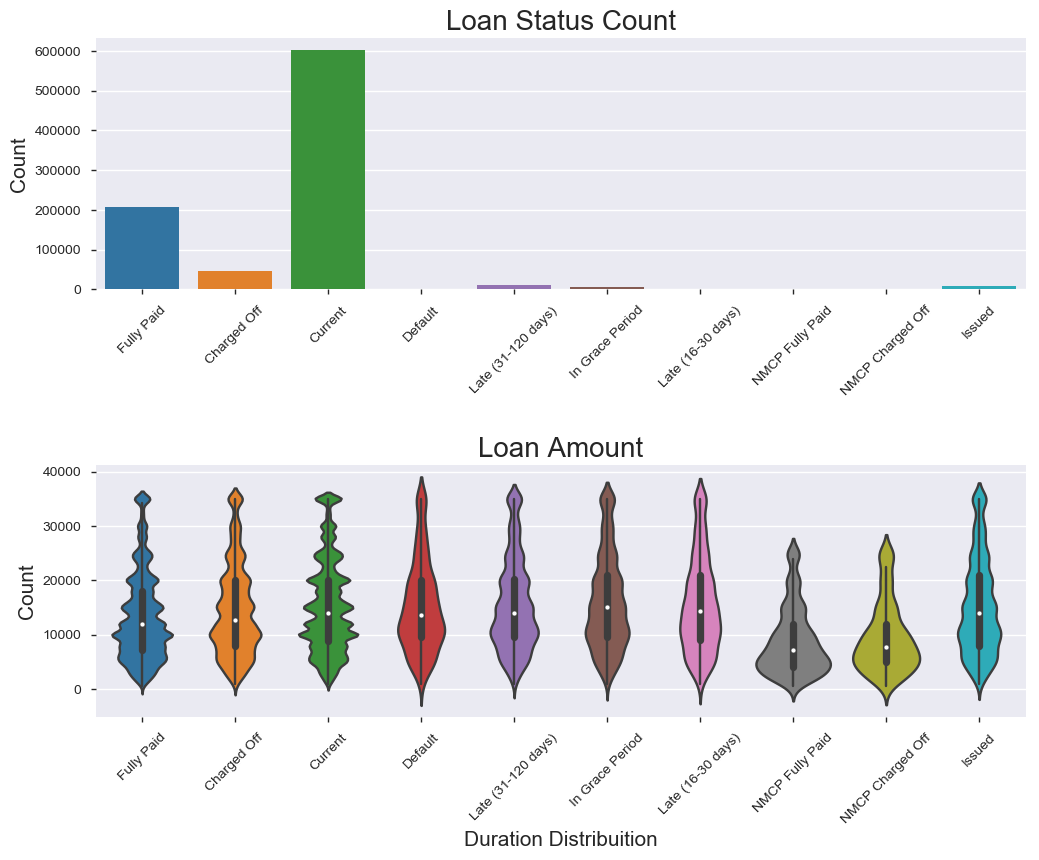

In [16]:
print(df.loan_status.value_counts())

plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

plt.subplot(312)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=df)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Duration Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Loan Amount", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

Loan status count in each status category and loan amount in each category

### Distribution of loan status by years

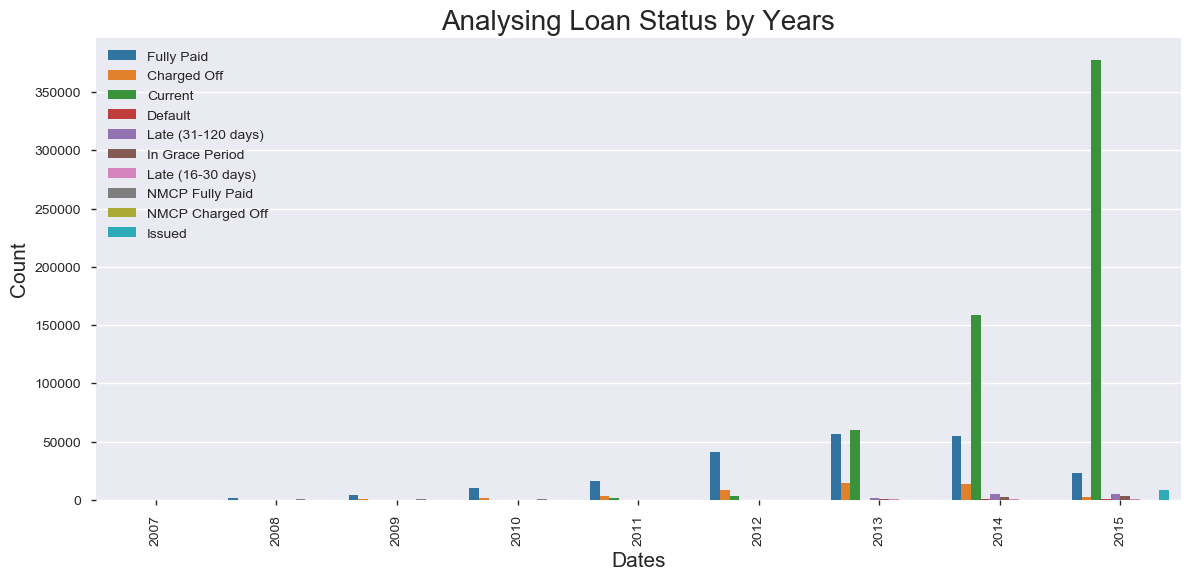

In [17]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()


Fully paid loan share is decreasing with the issue date and the current loans share is increasing.

### Distribution of defaulted loans

No handles with labels found to put in legend.


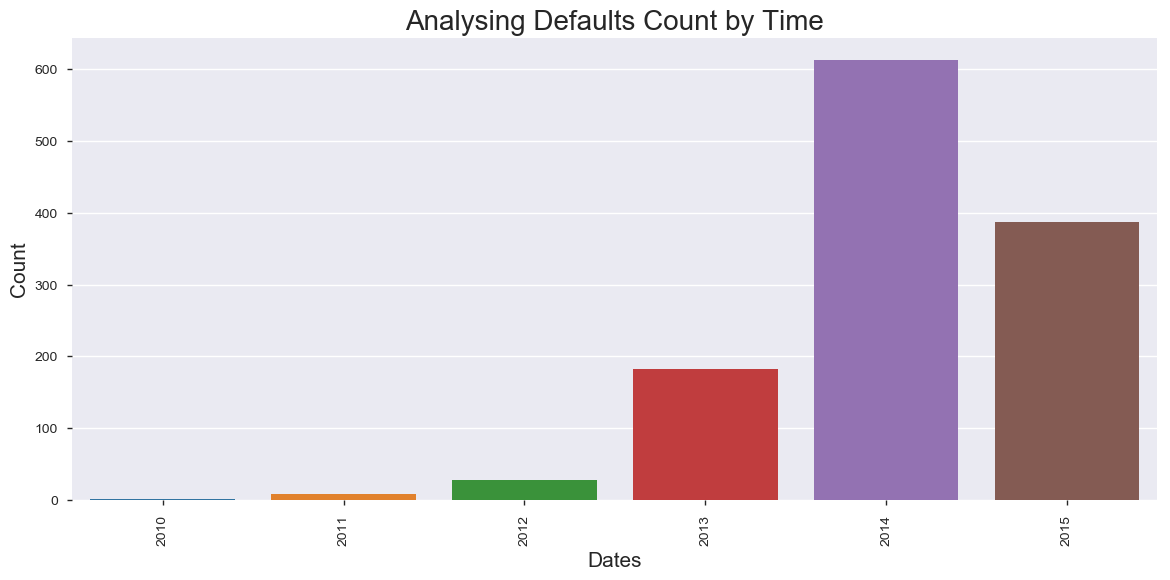

In [18]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df[df['loan_status'] =='Default'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Defaults Count by Time", fontsize=20)
plt.show()


Most defaulted loans come from 2014

## Distribution of Loan amounts per month

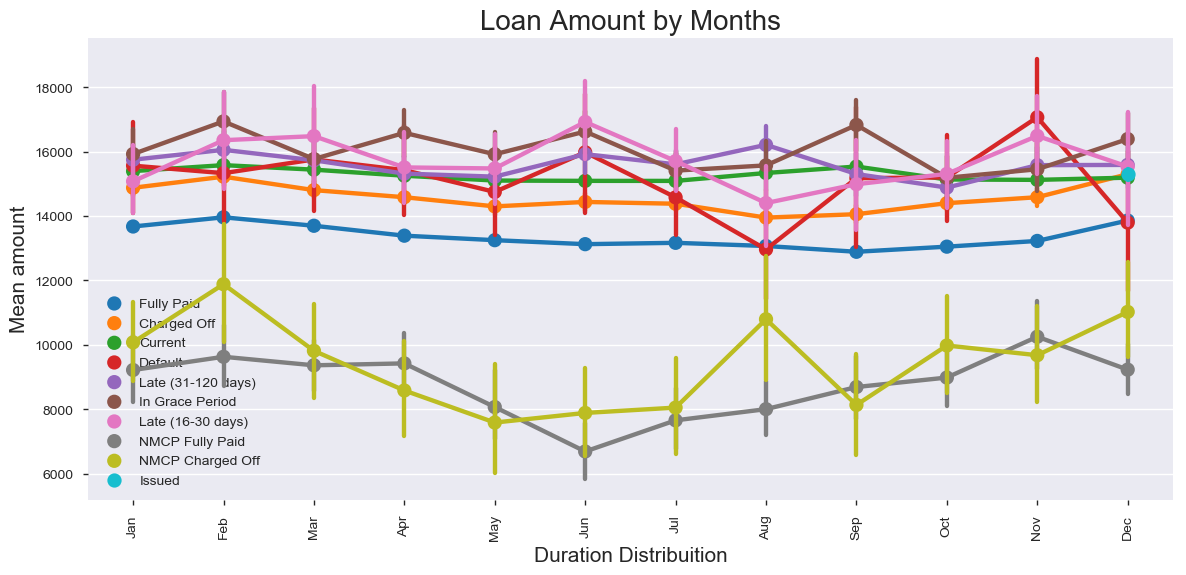

In [20]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df['issue_month'] = pd.Categorical(df['issue_month'],categories=months_order, ordered=True)

#Issue_d x loan_amount
plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_month', y='loan_amnt', 
                  data=df, 
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()


No significant monthly seasonal effects

## Loan grade and loan status distribution

In [21]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[loan_grade[0]], df[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2617,9519,12642,10486,6258,2934,792
Current,103322,171735,171175,91984,47061,13589,2913
Default,47,198,360,312,201,79,22
Fully Paid,39679,66546,52678,30020,12928,4726,1146
In Grace Period,365,1240,1887,1405,908,354,94
Issued,1448,2529,2472,1185,593,194,39
Late (16-30 days),134,410,678,569,368,155,43
Late (31-120 days),492,2004,3339,2890,1852,768,246
NMCP Charged Off,8,85,148,197,158,93,72


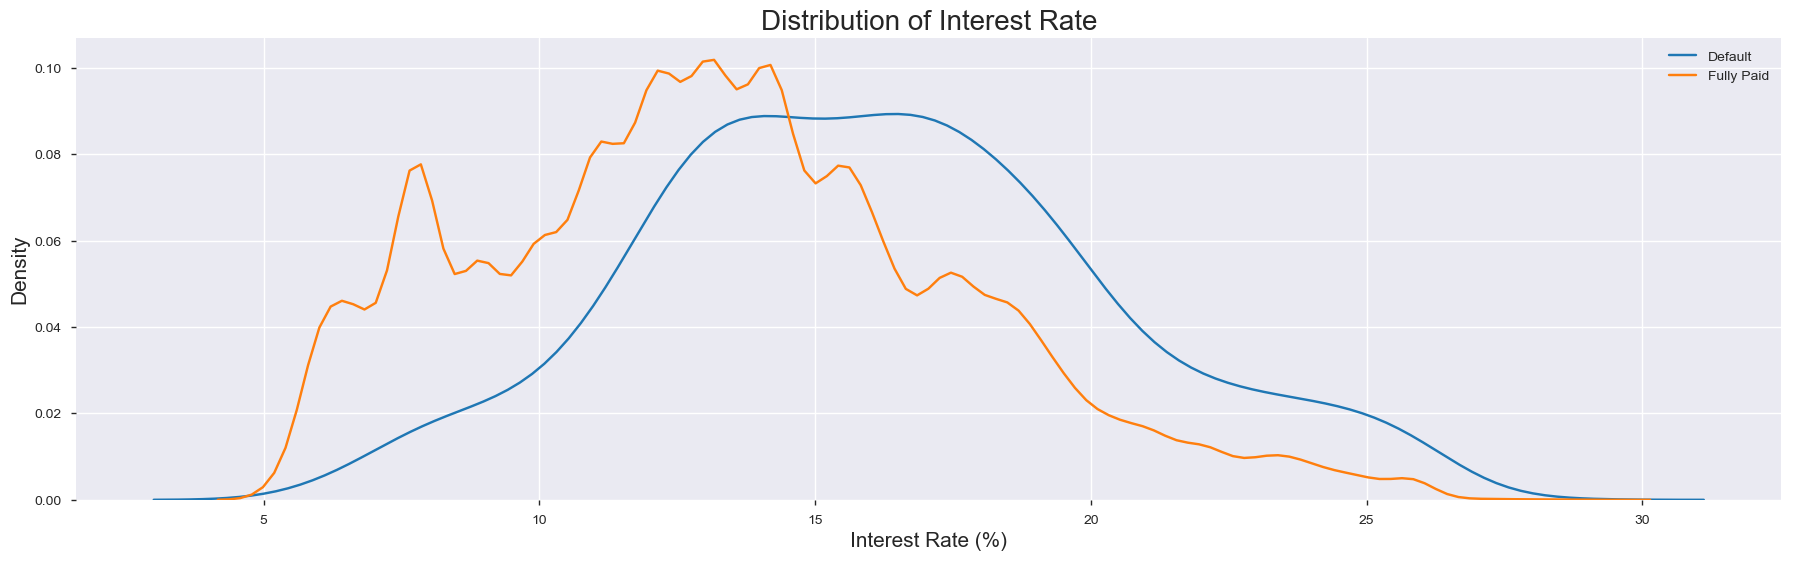

In [24]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['loan_status'] == 'Default', 'int_rate'], label = 'Default')
sns.kdeplot(df.loc[df['loan_status'] == 'Fully Paid', 'int_rate'], label = 'Fully Paid')
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

Default loans have on average higher interest rate

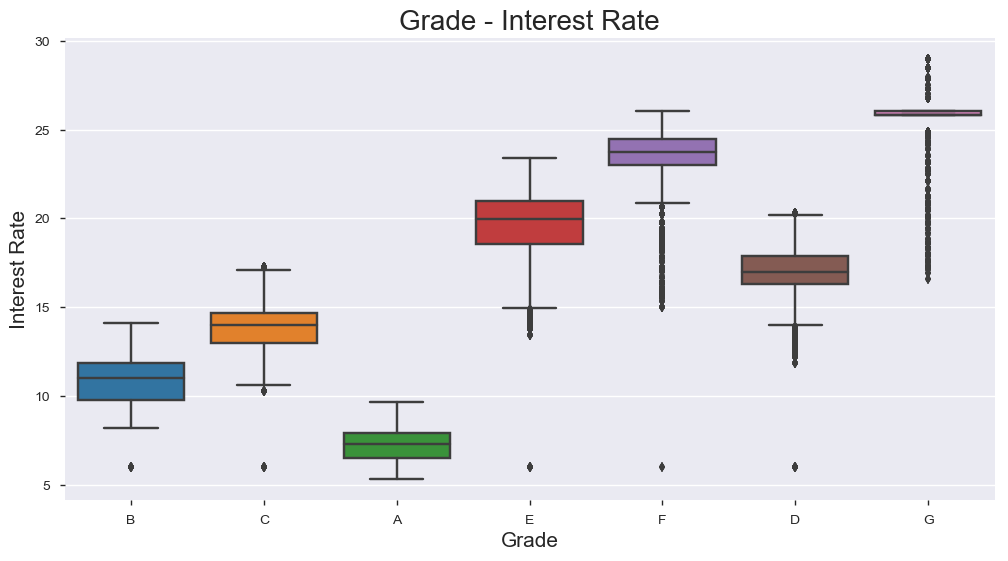

In [25]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x="grade",y="int_rate",data=df)
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

Loans with higher grades are charged higher interest rates (as we would expect)

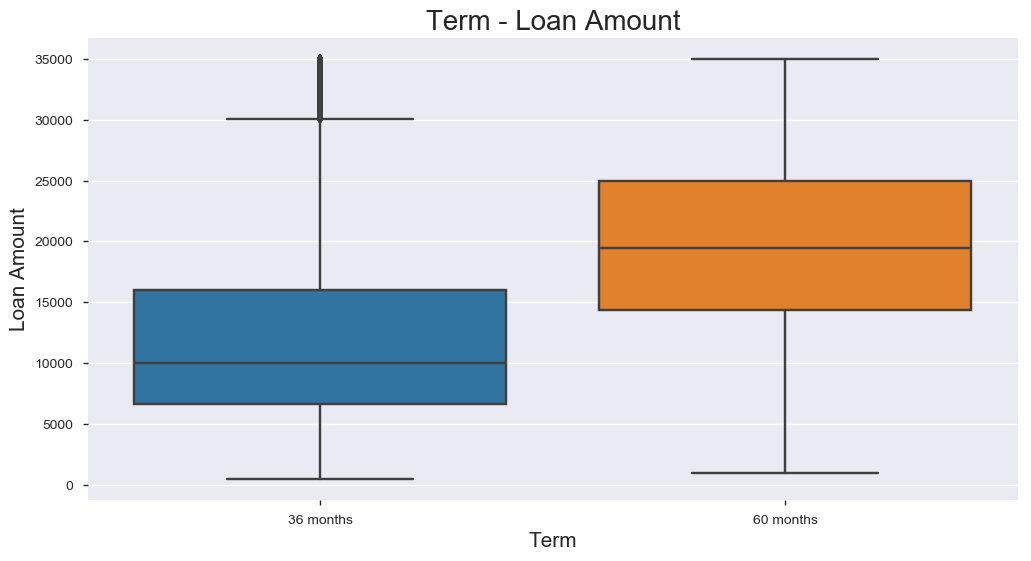

In [27]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x="term",y="loan_amnt",data=df)
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("Term", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

Loans with shorter duration have on average small loan amounts

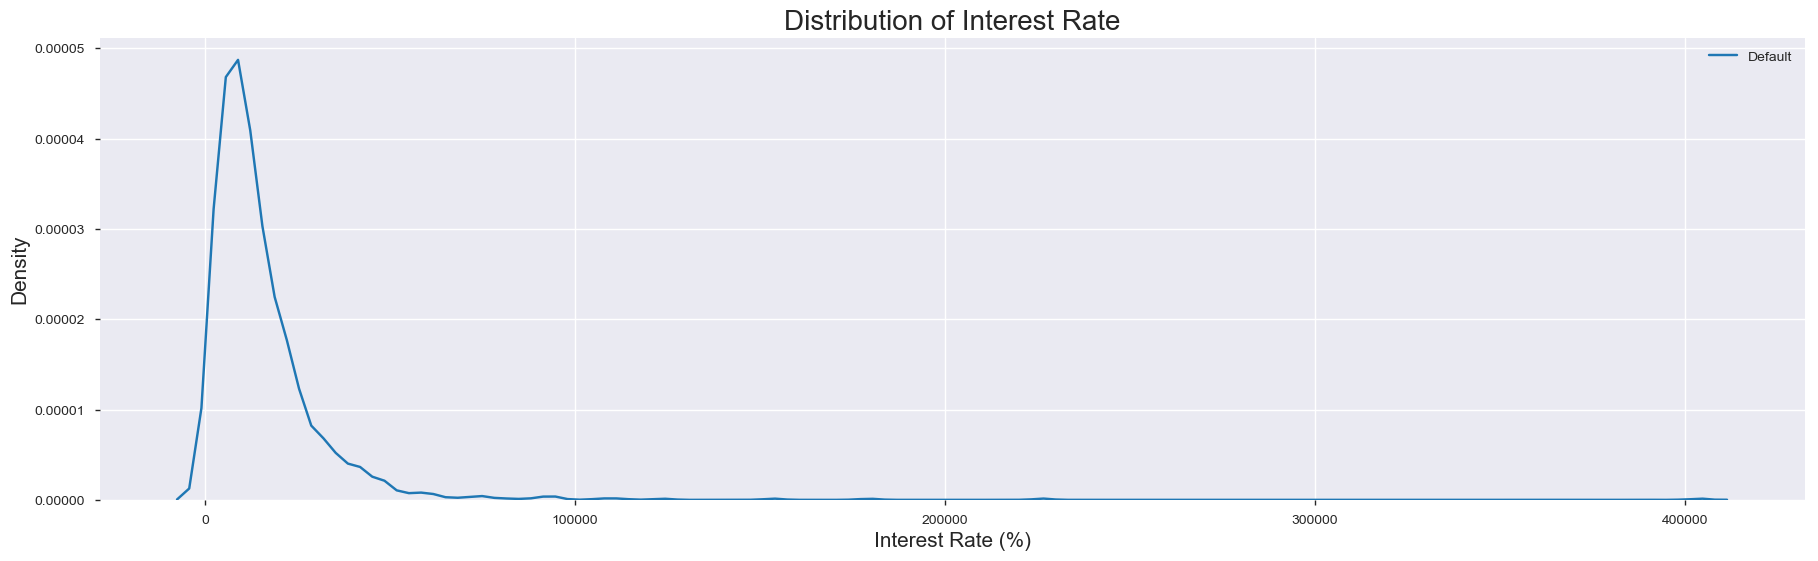

In [28]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['loan_status'] == 'Default', 'revol_bal'], label = 'Default')
#sns.kdeplot(df.loc[df['loan_status'] == 'Fully Paid', 'int_rate'], label = 'Fully Paid')
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

## Selection

We select only loans with 36 months term

In [47]:
df = df.loc[df.term == '36 months']

Last loan is from Dec 2015

In [48]:
print(max(df.issue_d))

2015-12-01 00:00:00


We select only loans which were issued at least 36 months ago (until Dec 2012)

In [49]:
df.issue_year = df.issue_year.astype(int)
df = df.loc[df.issue_year < 2013]

There are 75k loans with term of 36 months that were issued until Dec 2012

In [50]:
df.shape

(75004, 12)

### 1) What percentage of loans has been fully paid?

In [51]:
by_loan_status = df.groupby('loan_status').size().sort_values(ascending=False)
print(by_loan_status)

loan_status
Fully Paid                                             63357
Charged Off                                             9071
Does not meet the credit policy. Status:Fully Paid      1789
Does not meet the credit policy. Status:Charged Off      649
Late (31-120 days)                                        81
Current                                                   33
Default                                                   12
Late (16-30 days)                                          6
In Grace Period                                            6
dtype: int64


Most of the loans are either fully paid or charged off after 36 months. Some loans (3% of all) are not currently meeting the credit policy. Only small proportion of loands (<0.2%) have one of other statuses.

There are two types of loans that are marked as fully paid:
- Fully paid
- Does not meet the credit policy. Status:Fully Paid

We will calculate the percentage for all fully paid and only the ones meeting credit policy

In [52]:
all_fully_paid = sum(by_loan_status.loc[['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']])
fully_paid_within_policy = by_loan_status.loc['Fully Paid']
all_loans = len(df)
loans_within_policy = len(df) - sum(by_loan_status.loc[[
    'Does not meet the credit policy. Status:Charged Off', 'Does not meet the credit policy. Status:Fully Paid']])
print('Fully paid loans as % of all loans:', all_fully_paid / all_loans)
print('Fully paid loans as % of loans that meet credit policy:', fully_paid_within_policy / loans_within_policy)

Fully paid loans as % of all loans: 0.8685670097594795
Fully paid loans as % of loans that meet credit policy: 0.8730948378028278


#### ANSWER: Fully paid loans represent ~87% of all loans using both methods to calculate it

### 2) When bucketed by year of origination and grade, which cohort has the highest rate of defaults? Here you may assume that any loan which was not fully paid had “defaulted”.

Assuming that all non-fully paid loans are defaulted

In [54]:
df['default'] = 1
df.loc[df['loan_status'] == 'Fully Paid', 'default'] = 0
by_default = df.groupby('default').size().sort_values(ascending=False)
print(by_default)

default
0    63357
1    11647
dtype: int64


First we look at the number of loans for each of the cohorts. More recent loands are more common (growing business) and high grades (E-G) are fairly rare.

In [55]:
df.groupby(['issue_year', 'grade']).count()[['default']].unstack(1).fillna(0)

default                                 
grade            A      B     C     D    E    F   G
issue_year                                         
2007            78     98   141    99  100   52  35
2008           318    594   580   419  285  111  86
2009          1203   1445  1348   817  308  105  55
2010          2567   2805  2070  1253  336   91  34
2011          5579   4722  2203  1261  272   54  10
2012         10753  16805  9902  5088  795  103  24

Defaults rates for loans issued in 2007 (66%) and 2008 (45%) are much higher than for more current years (11-22%). This may be related to the financial crisis that negatively affected financial condition of lenders

In [56]:
df.groupby(['issue_year']).mean()[['default']].T

issue_year,2007,2008,2009,2010,2011,2012
default,0.658375,0.450481,0.219466,0.167322,0.106305,0.137612


Default rates are more common for higher grades of loans, across all loand issue year. This suggests that the LC policy reflects quite well the riskiness of loans. The exception are loans from 2012 where grades F and G had lower default rates than grades D and E, however number of loans for grades F and G is relatively low.

In [57]:
df.groupby(['grade']).mean()[['default']].T

grade,A,B,C,D,E,F,G
default,0.070446,0.130719,0.197119,0.256014,0.375477,0.536822,0.77459


In [58]:
df.groupby(['issue_year', 'grade']).mean()[['default']].unstack(1).fillna(0)

default                                                    \
grade              A         B         C         D         E         F   
issue_year                                                               
2007        0.282051  0.459184  0.567376  0.777778  0.910000  0.903846   
2008        0.125786  0.271044  0.379310  0.599045  0.778947  0.900901   
2009        0.086451  0.163322  0.245549  0.334149  0.399351  0.495238   
2010        0.053370  0.134403  0.224155  0.294493  0.348214  0.505495   
2011        0.063990  0.105676  0.155243  0.180809  0.205882  0.240741   
2012        0.072910  0.127462  0.178247  0.214230  0.223899  0.184466   

                      
grade              G  
issue_year            
2007        1.000000  
2008        0.976744  
2009        0.727273  
2010        0.647059  
2011        0.400000  
2012        0.166667

### 3) When bucketed by year of origination and grade, what annualized rate of return have these loans generated on average? For simplicity, use the following approximation:

Annualized rate of return = (total_pymnt / funded_amnt) ^ (1/3) - 1

Unweighted average ARR amounted to 1.9% per loan

In [60]:
df['arr'] = (df.total_pymnt / df.funded_amnt) ** (1/3) - 1
df.arr.mean()

0.019088078445375235

Total ARR amounted to 3% for all loans (whole portfolio) weighted by loan amounts

In [61]:
(sum(df.total_pymnt) / sum(df.funded_amnt)) ** (1/3) - 1

0.030675197335574556